In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [147]:
data = pd.read_csv('Automobile_data.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [148]:
data.replace('?',np.nan,inplace=True)

In [149]:
data.shape

(205, 26)

In [150]:
data.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    164 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         203 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null object
stroke               201 non-null object
compression-ratio    205 non-null float64
horsepower           203 non-nul

In [152]:
data["normalized-losses"]=data["normalized-losses"].astype('float64')
data['bore']=data['bore'].astype('float64')
data['stroke']=data['stroke'].astype('float64')
data['horsepower']=data['horsepower'].astype('float64')
data['peak-rpm']=data['peak-rpm'].astype('float64')
data['price']=data['price'].astype('float64')

In [153]:
data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [154]:
#non-numerical features
data.describe(include=['object','bool'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


In [155]:
data['fuel-type'].value_counts()

gas       185
diesel     20
Name: fuel-type, dtype: int64

In [156]:
data['fuel-type'].value_counts(normalize=True)

gas       0.902439
diesel    0.097561
Name: fuel-type, dtype: float64

In [157]:
data.sort_values(by='price',ascending=False).head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
74,1,NaN,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
73,0,NaN,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
128,3,NaN,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207.0,5900.0,17,25,37028.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


In [158]:
data.sort_values(by=['peak-rpm','price'],ascending=[False,True]).head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
165,1,168.0,toyota,gas,std,two,sedan,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9298.0
166,1,168.0,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98,mpfi,3.24,3.08,9.4,112.0,6600.0,26,29,9538.0
33,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,6529.0
31,2,137.0,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,31,38,6855.0
34,1,101.0,honda,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76.0,6000.0,30,34,7129.0


In [159]:
data[data['make']=='honda']['normalized-losses'].mean()

103.0

In [160]:
d={'one':1,'two':2,'three':3,'four':4,'five':5,'six':6}
data['num-of-doors']=data['num-of-doors'].map(d)
data['num-of-cylinders']=data['num-of-cylinders'].map(d)

In [161]:
data['num-of-cylinders'].head()

0    4.0
1    4.0
2    6.0
3    4.0
4    5.0
Name: num-of-cylinders, dtype: float64

In [162]:
data.fillna(data.mean(),inplace=True)
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [163]:
#visualisations

In [164]:
features=[]
for col in data:
    if data[col].dtypes!='object':
        features.append(col)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7f13278198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f7f10398da0>]], dtype=object)

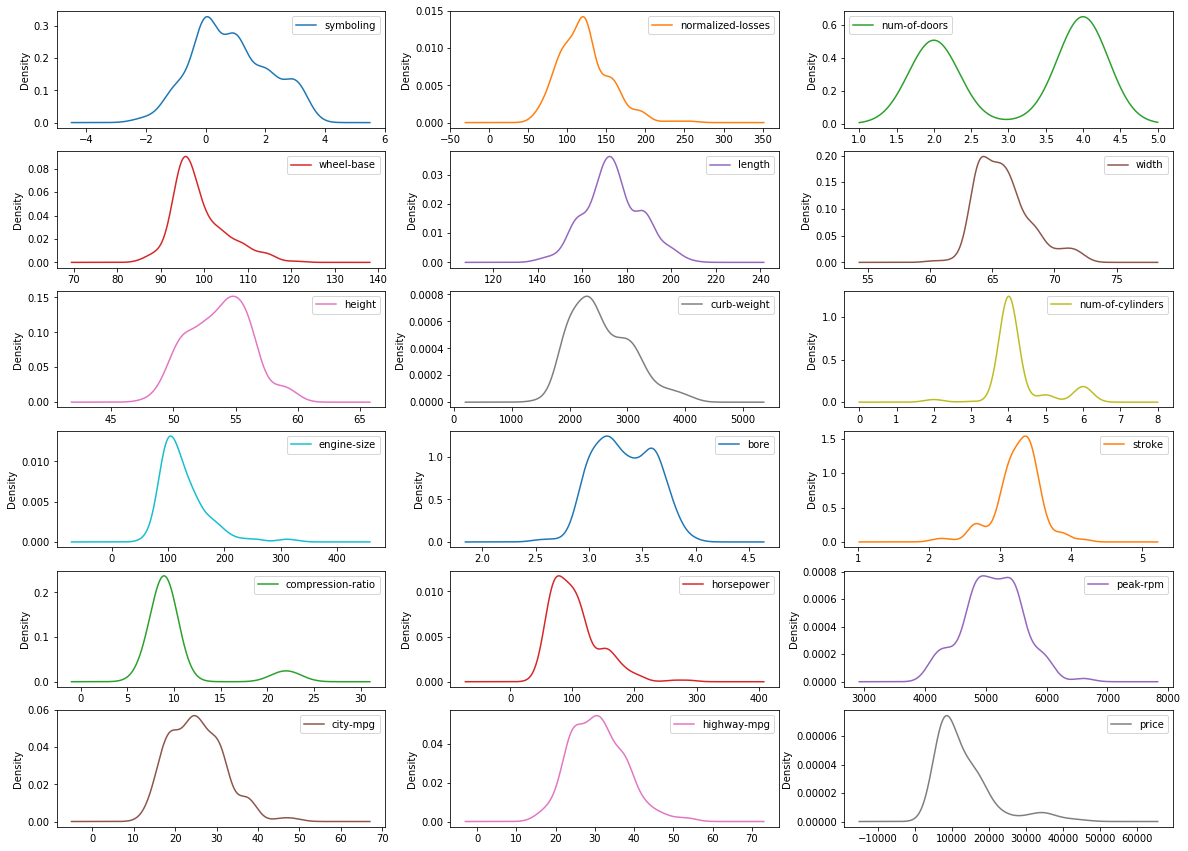

In [165]:
data[features].plot(kind='density',subplots=True,layout=(6,3),sharex=False,figsize=(20,15))

symboling               AxesSubplot(0.125,0.772143;0.227941x0.107857)
normalized-losses    AxesSubplot(0.398529,0.772143;0.227941x0.107857)
num-of-doors         AxesSubplot(0.672059,0.772143;0.227941x0.107857)
wheel-base              AxesSubplot(0.125,0.642714;0.227941x0.107857)
length               AxesSubplot(0.398529,0.642714;0.227941x0.107857)
width                AxesSubplot(0.672059,0.642714;0.227941x0.107857)
height                  AxesSubplot(0.125,0.513286;0.227941x0.107857)
curb-weight          AxesSubplot(0.398529,0.513286;0.227941x0.107857)
num-of-cylinders     AxesSubplot(0.672059,0.513286;0.227941x0.107857)
engine-size             AxesSubplot(0.125,0.383857;0.227941x0.107857)
bore                 AxesSubplot(0.398529,0.383857;0.227941x0.107857)
stroke               AxesSubplot(0.672059,0.383857;0.227941x0.107857)
compression-ratio       AxesSubplot(0.125,0.254429;0.227941x0.107857)
horsepower           AxesSubplot(0.398529,0.254429;0.227941x0.107857)
peak-rpm            

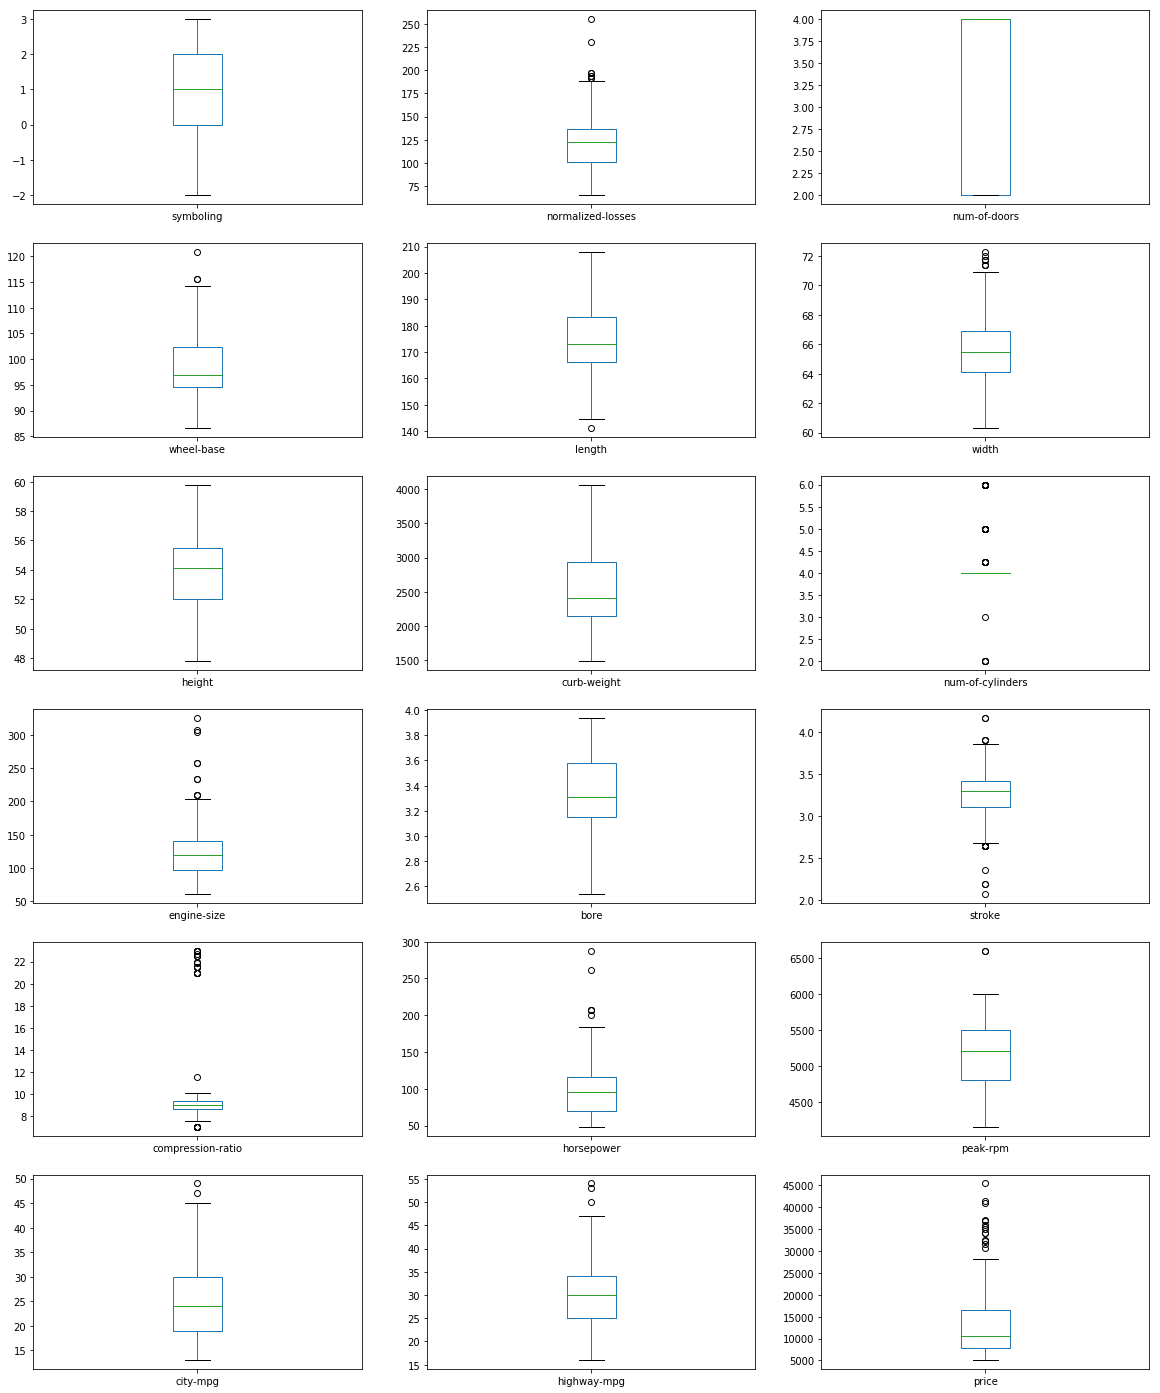

In [166]:
data[features].plot(kind='box',subplots=True,layout=(6,3),figsize=(20,25))

In [167]:
cat_features=[]
for col in data:
    if data[col].dtypes=='object':
        cat_features.append(col)

In [168]:
cat_features

['make',
 'fuel-type',
 'aspiration',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'fuel-system']

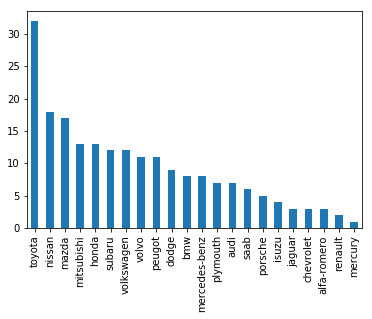

In [169]:
data['make'].value_counts().plot(kind='bar')

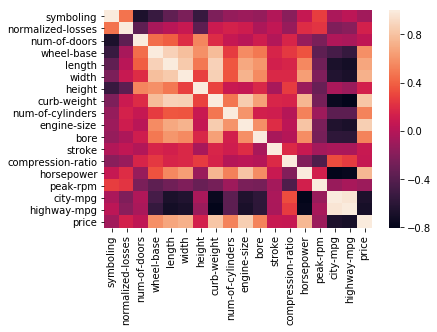

In [170]:
corr_matrix = data[features].corr()
sns.heatmap(corr_matrix)

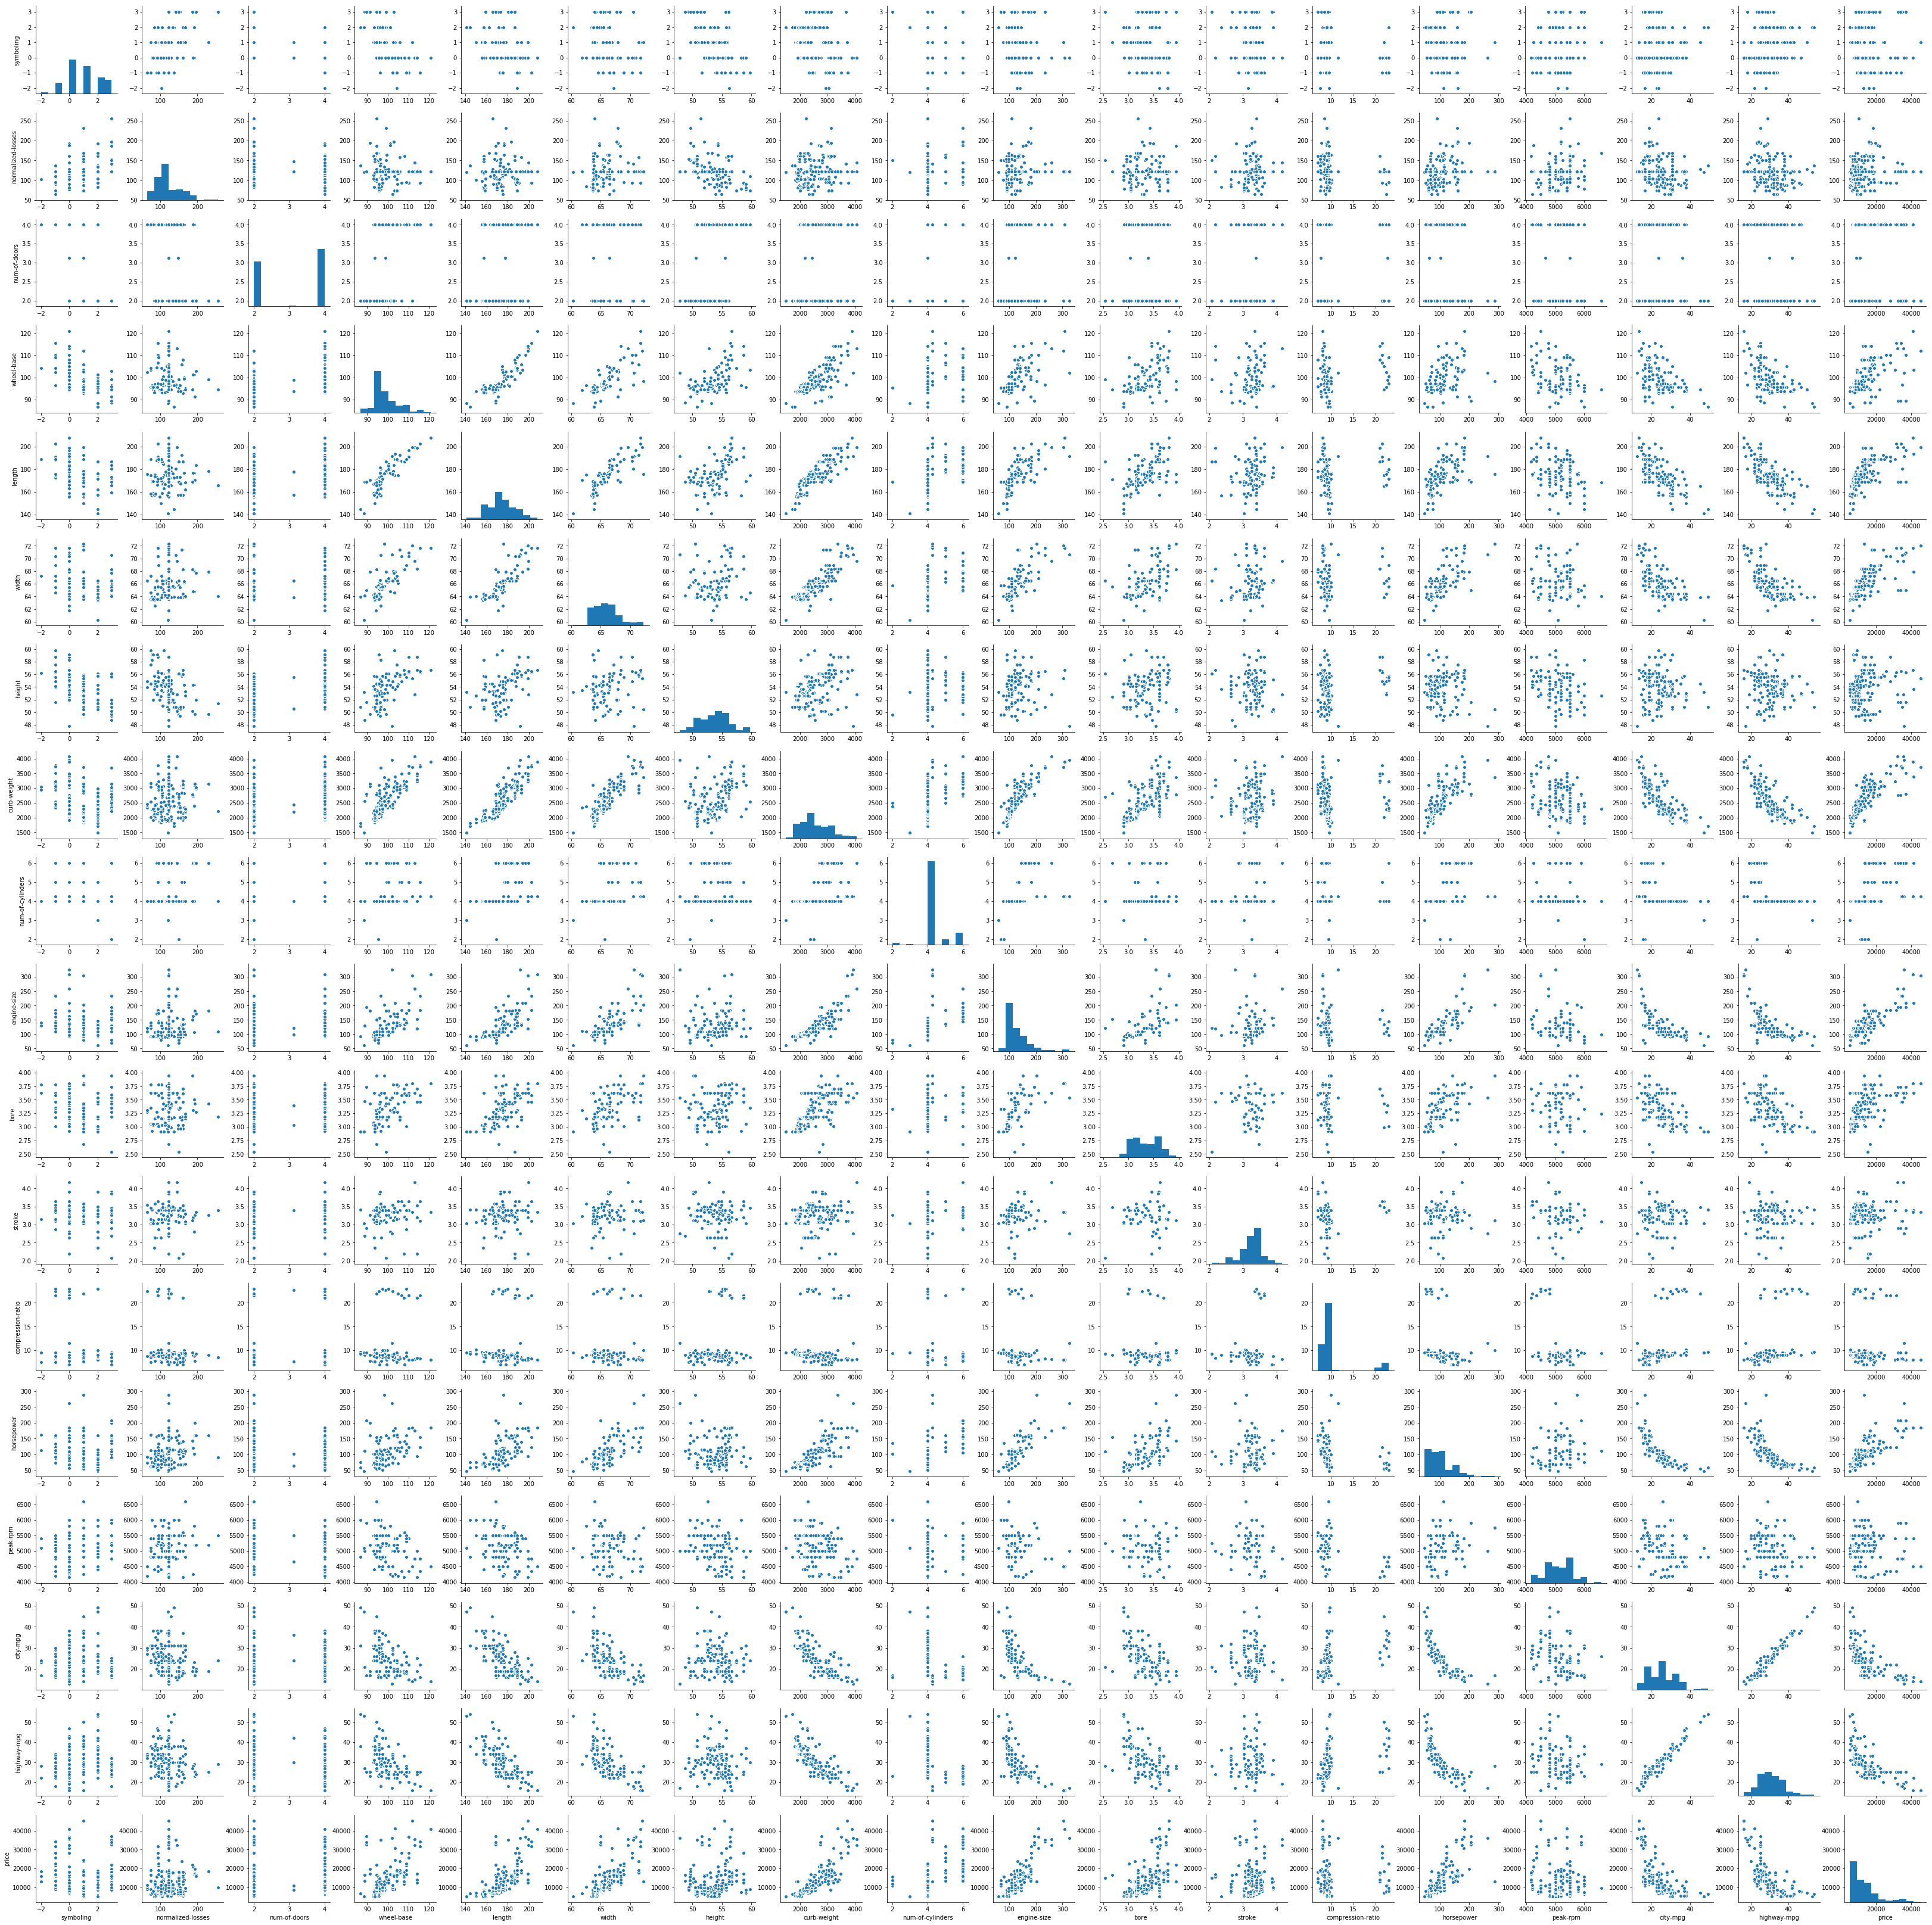

In [171]:
sns.pairplot(data[features])

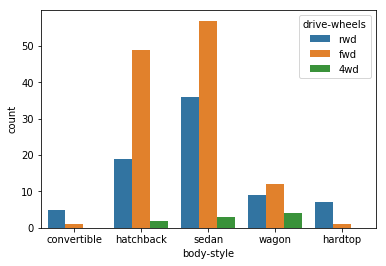

In [172]:
sns.countplot(x='body-style',data=data,hue='drive-wheels')